# Metodi numerici per l'informatica - Esercitazione 1

Benvenuti al corso di *Metodi Numerici dell'Informatica*. L'obiettivo delle esercitazioni è quello di impadronirsi dei concetti spiegati nelle lezioni teoriche da un punto di vista pratico. In particolare, useremo il linguaggio *Python 3.8* e la libreria per il calcolo numerico *NumPy*. Le Esercitazioni sono strutturate come Jupyter notebooks in Colab dove vengono presentati richiami alla teoria, esempi eseguibili ed esercizi guidati. Ricordiamo di eseguire i notebooks in ordine sequenziale. Eseguire il notebook in ordine diverso da quello sequenziale puo' portare a risultati non aspettati dato che usiamo variabili aventi lo stesso nome in celle diverse. **Let's have fun!**

Gli argomenti dell'Esercitazione 1 sono i seguenti:

1. *Vettori*
2. *Matrici*
3. *Applicazioni lineari*

Prima di iniziare, come primo step, dobbiamo importare le dipendenze necessarie per eseguire il notebook. Tale operazione sarà eseguita all'inizio di tutti i notebooks futuri. Le due librerie che useremo principalmente sono NumPy, per eseguire calcoli numerici e *Matplotlib* per visualizzare i risultati. Inoltre importiamo il modulo locale `utils.py` per caricare alcune funzionionalità aggiuntive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Quando eseguiamo il notebook su Colab bisogna scaricare diversi file locali dalla repository git, che useremo in seguito:

In [2]:
!wget https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/03_ex1/bitcoin.txt
!wget https://github.com/erodola/NumMeth-s2-2022/raw/main/03_ex1/drums.wav
!wget https://github.com/erodola/NumMeth-s2-2022/raw/main/03_ex1/bass.wav
!wget https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/03_ex1/utils.py


--2022-03-08 23:12:32--  https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/03_ex1/bitcoin.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 47515 (46K) [text/plain]
Saving to: ‘bitcoin.txt.1’

bitcoin.txt.1       100%[===================>]  46.40K  --.-KB/s    in 0.01s   

2022-03-08 23:12:32 (3.72 MB/s) - ‘bitcoin.txt.1’ saved [47515/47515]

--2022-03-08 23:12:32--  https://github.com/erodola/NumMeth-s2-2022/raw/main/03_ex1/drums.wav
Resolving github.com (github.com)... 52.69.186.44
Connecting to github.com (github.com)|52.69.186.44|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/erodola/NumMeth-s2-2022/main/03_ex1/drums.wav [following]
--2022-03-08 23:12:32--  https://raw.githu

## 1. Vettori

### 1.a Creazione di vettori

Il datatype fondamentale che NumPy adopera è il `numpy.ndarray`, chiamato anche semplicemente *array* Numpy. Con questa struttura dati possiamo rappresentare un'ampia classe di oggetti algebrici quali vettori, matrici e tensori multidimensionali. Iniziamo con l'oggetto numerico elementare, ossia il vettore.

Un vettore (reale) $n$-dimensionale $\mathbf{x}$  è una sequenza (finita e ordinata) di $n$ numeri reali $x_i \in \mathbb{R}$:
$$\mathbf{x} = (x_1, \dots, x_n)  \in \mathbb{R}^n$$

In Python potremmo rappresentare un vettore semplicemente con il datatype `list`:

In [3]:
x = [0., 3.5, 4.]

print(f"x = {x}")
print(f"type(x) = {type(x)}")

x = [0.0, 3.5, 4.0]
type(x) = <class 'list'>


Il problema di questa rappresentazione e' l'assenza di un numero cospicuo di operazioni che possono essere effettuate con i vettori numerici. Per esempio se proviamo a creare un un'altro vettore $\mathbf{y}$ come lista di numeri e applichiamo l'operatore `+` di Python, otteniamo la concatenazione delle liste invece del vettore $(-1, 3.5, 6)$:

In [6]:
y = [-2., 0., 2.]
print(f"x + y = {x + y}")

x + y = [0.0, 3.5, 4.0, -2.0, 0.0, 2.0]


Per creare un vettore numerico quindi usiamo Numpy (il modulo Numpy e' importato come `np`, prasse comune nell'utilizzo della libreria), passando la lista alla funzione `array`:

In [9]:
x = np.array([0., 3.5, 4.])  # 0. e 4. sono di tipo float64, dato che viene aggiunto un punto alla fine

print(f"x = { x }")
print(f"type(x) = { type(x) }")

x = [0.  3.5 4. ]
type(x) = <class 'numpy.ndarray'>


Per conoscere a posteriori il numero di elementi contenuti nel vettore possiamo usare l'attributo `shape`, il quale e' un dato `tuple`. In seguito (quando parleremo di matrici) vedremo più in dettaglio il significato di questo attributo. Per adesso, la dimensione del vettore e' data dall'unico elemento contenuto nella tupla, ossia `shape[0]`:

In [10]:
print(f"x.shape = {x.shape}")
print(f"x.shape[0] = {x.shape[0]}")

x.shape = (3,)
x.shape[0] = 3


Tipicamente adoperiamo vettori reali però può risultare opportuno usare vettori le cui componenti sono numeri interi, per creare un vettore di interi, la lista passata ad `array` deve contenere solo componenti `int64` (o varianti come `long`). Il vettore $\mathbf{x}$ definito sopra contiene entrate reali (tipo `float64`). Per conoscere il datatype delle componenti di un array Numpy, si puo' accedere all'attributo `dtype` dell'oggetto.

In [11]:
x_int = np.array([1, 2, 3])

print(f"x_int = {x_int}")
print(f"x_int.dtype = {x_int.dtype}")
print(f"x.dtype = {x.dtype}")

x_int = [1 2 3]
x_int.dtype = int64
x.dtype = float64


Se alcune entrate del vettore sono reali ed altre intere, Numpy converte automaticamente le entrate intere in entrate reali e otteniamo un vettore reale:

In [12]:
x = np.array([0, 3, 4.]) # notare che 4. è float64
print(f"x = {x}")

x = [0. 3. 4.]


Esistono altri metodi per creare vettori. Tre casi importanti sono i seguenti:

1. il vettore nullo $\mathbf{0}$, `np.zeros`
2. il vettore $\mathbf{1}$ contenente 1 su ogni entrata, `np.ones`
3. vettori randomm, le cui componenti sono (pseudo-)casuali essendo campionate da una distribuzione di probabilità; per campionare dalla distribuzione uniforme in $[0, 1)$ si usa `np.random.rand`

Per crearli bisogna specificare solamente la dimensione del vettore:

In [13]:
d = 3

x_0 = np.zeros(d)
x_1 = np.ones(d)
x_rand = np.random.rand(d)

print(f"x_0 = {x_0}")
print(f"x_1 = {x_1}")
print(f"x_rand = {x_rand}")

x_0 = [0. 0. 0.]
x_1 = [1. 1. 1.]
x_rand = [0.01196416 0.19547516 0.40141365]


Per indicizzare la componente $i$-esima di un vettore si usa la sintassi delle parentesi quadrate (come con le liste Python). Lo stesso vale per lo slicing di sottovettori:

In [14]:
x = np.array([3., 2., 1., 0., -1., -2.])
print(f"x = {x}")

for i in range(3):
    print(f"x[{i}] = {x[i]}")

print(f"x[2:] = {x[2:]}")
print(f"x[:4] = {x[:4]}")
print(f"x[2:4] = {x[2:4]}")

x = [ 3.  2.  1.  0. -1. -2.]
x[0] = 3.0
x[1] = 2.0
x[2] = 1.0
x[2:] = [ 1.  0. -1. -2.]
x[:4] = [3. 2. 1. 0.]
x[2:4] = [1. 0.]


##### Esercizi

1. Crea il vettore $\mathbf{x} = (1, \dots, 100) \in \mathbb{R}^{100}$
2. Crea un vettore di dimensione 10 campionato dalla distribuzione *gaussiana unitaria* (detta anche *normale* o *standard*). (hint: usare la documentazione di Numpy)

In [ ]:
# spazio lasciato per gli esercizi

### 1.b Visualizzare vettori

L'utilita' dei vettori sta nel poter modellare diversi tipi di dato utili nelle applicazioni. Classicamente i vettori furono introdotti per rapresentare quantità geometriche tipiche della fisica (si pensi al concetto di forza in meccanica classica o in elettrodinamica), ma essi possono esprimere entità molto diverse tra di loro spaziando dalle onde sonore al calore presente su un corpo. Per rendere più chiara questa idea visualizziamo alcuni esempi interessanti.

Iniziamo con la visualizzazione classica di un vettore come un segmento orientato nel piano / spazio. Nel caso di uno spazio vettoriale tutti i vettori sono centrati nell'origine. Per visualizzare una freccia in 2D si può usare la funzione `arrow` di Matplotlib

In [5]:
def plot_vectors_2d(*xs, colors=None, title="", labels=None, xlim=1.2, ylim=1.2, head_width=0.04, head_length=0.1):
    # crea la figura (una figure puo contenere diversi assi cartesiani come subplot) con la dimensione in inch specificata in `figsize`
    fig = plt.figure(figsize=(6, 6))
    # aggiungiamo un'asse cartesiano alla figura
    ax = fig.add_subplot()
    # imposta il titolo
    ax.set_title(title)
    # disegna la freccia;
    # i primi due argomenti sono il punto (C_x, C_y) dove viene posizionata la coda della vettore
    # il terzo e il quarto argomento sono l'offset (δx, δy) relativo a (C_x, C_y), quindi la testa del vettore si troverà sul punto (C_x+δx, C_y+δy)
    # gli argomenti `fc` ed `ec` specificano il colore interno e del bordo del vettore, rispettivamente ('k' sta per black)
    # `head_width` e `head_length` indicano le dimensioni della punta (di default sono impostati a 0 quindi sembra disegnare un segmento invece di un vettore
    for i, x in enumerate(xs):
        ax.arrow(0, 0, x[0], x[1],
                  fc=colors[i] if colors else 'k', ec=colors[i] if colors else 'k', head_width=head_width, head_length=head_length)
        if labels:
            ax.text(x=x[0] / 2 + 0.1*x[0], y=x[1]/2, s=labels[i])
    # imposta l'intervallo delle x e y visualizzabili
    ax.set_xlim([-xlim, xlim])
    ax.set_ylim([-ylim, ylim])
    # if legend:
    #    ax.legend(legend)
    # abilita la visualizzazione di una griglia in sottofondo
    # ax.grid()

In [6]:
x_2d = np.random.rand(2)
x_2d_2 = np.random.rand(2)

print(f"x_2d = {x_2d}")

x_2d = [0.19576575 0.05743921]


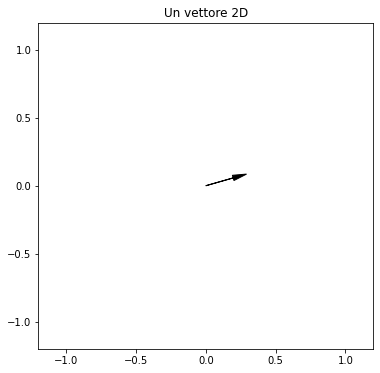

In [7]:
plot_vectors_2d(x_2d, title="Un vettore 2D")

Di default in Matplotlib non si può visualizzare una freccia 3D come nel caso 2D. A tal fine abbiamo definito la classe `Arrow3D` nel file `utils.py`, che qui importiamo:

In [13]:
from utils import Arrow3D

def plot_vectors_3d(*xs, colors=None, title="", labels=None, xlim=1.2, ylim=1.2, zlim=1.2):
    # crea la figura
    fig = plt.figure(figsize=(6, 6))
    # aggiunge un'asse; notare l'argomento aggiuntivo projection='3d', necessario per creare un asse 3D
    ax = fig.add_subplot(projection='3d')
    # imposta il titolo
    ax.set_title(title)
    for i, x in enumerate(xs):
        # definisce un dizionario di parametri usati per definire lo stile di Arrow3D;
        # mutation_scale definisce la dimensione della punta, arrowstyle lo stile della punta,
        # color il colore della freccia come nel caso 2D
        arrow_prop_dict = dict(mutation_scale=20, arrowstyle='-|>', color=colors[i] if colors else 'k')
        # crea la freccia (le tre liste definiscono i valori [C_x, δx], [C_y, δy], [C_z, δz] come nell'esempio 2D)
        a = Arrow3D([0, x[0]], [0, x[1]], [0, x[2]], **arrow_prop_dict)
        # aggiunge la freccia all'asse
        ax.add_artist(a)
        if labels:
            ax.text(x=x[0] / 2 + 0.3*x[0], y=x[1]/2, z=x[2] / 2, s=labels[i])

    # imposta i limiti del plot come nell'esempio 2D
    ax.set_xlim([-xlim, xlim])
    ax.set_ylim([-ylim, ylim])
    ax.set_zlim([-zlim, zlim])
   

In [11]:
x_3d = np.random.rand(3)

print(f"x_3d = {x_3d}")

x_3d = [0.9064393  0.54845463 0.36832494]


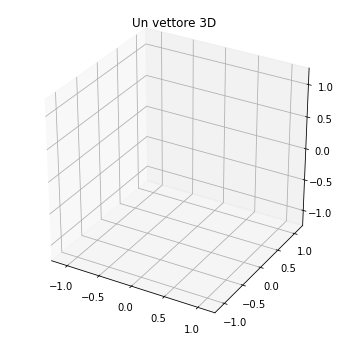

In [14]:
plot_vectors_3d(x_3d, title="Un vettore 3D")

Quando il numero di componenti di un vettore $\mathbf{x} = (x_0, \dots, x_n)$ è maggiore di 3 possiamo trattare il vettore come una sequenza, ossia come un'applicazione $$s: [n] \to \mathbb{R},$$ dove $[n] = \{1, \dots, n\}$ è l'insieme dei numeri naturali da $1$ a $n$, ponendo $s(i) = x_i, \forall i \in [n]$. Come esempio possiamo visualizzare l'andamento del valore di Bitcoin nell'ultima settimana. Carichiamo il file `bitcoin.txt` dal disco:

In [51]:
# apertura del file
f_bitcoin = open('bitcoin.txt')
# comprensione di liste per scorrere le righe del file (ogni riga e' un valore numerico) e convertire da `str` a `float`
data_bitcoin = [float(line) for line in f_bitcoin]
# abbiamo effetuato lo slicing degli ultimi 14 valori nella lista, corrispondenti alle ultime 2 settimane
bitcoin = np.array(data_bitcoin)[-14:]

print(f"bitcoin = { bitcoin }")

bitcoin = [33723.0289781  34662.43589358 31637.78005541 32186.27767093
 34649.64458753 34434.33531428 35867.77773549 35040.83724889
 33572.11765253 33897.04858963 34668.54840182 35287.77976616
 33746.00245614 34235.19345116]


Per visualizzare una sequenza possiamo usare la funzione `plot` di Matplotlib. Il primo argomento e' un vettore contenente $[n]$ mentre il secondo contiene i valori di `bitcoin`.

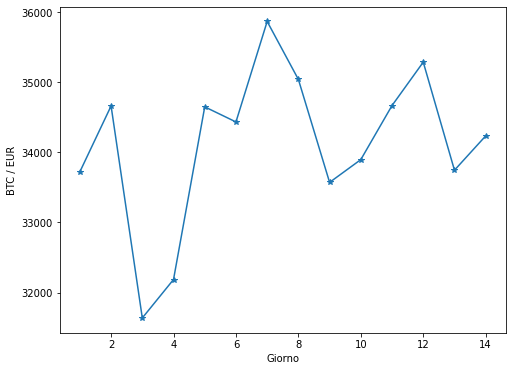

In [52]:
x = np.arange(1, 14 + 1) # np.arange(1, 14+1) e' equivalente a np.array(range(1,14+1)); ricordiamo che l'estremo destro del range e' escluso
y = bitcoin

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
# imposta la label dell'asse x
ax.set_xlabel('Giorno')
# imposta la label dell'asse y
ax.set_ylabel('BTC / EUR')
ax.plot(x, y, '*-')
plt.show()

Vediamo cosa succede quando osserviamo l'andamento dal giorno il `2013-04-29`. Per effettuare il plot bisogna conoscere il numero di elementi nel vettore, quindi lo scopriamo usando `shape`:

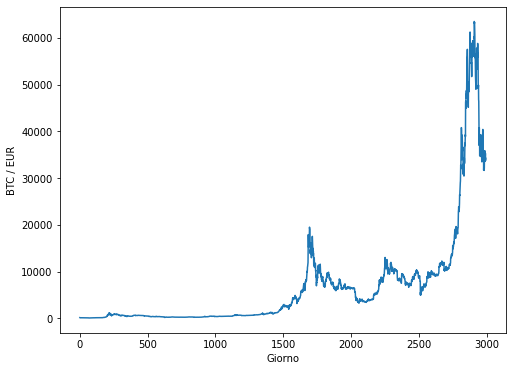

In [53]:
bitcoin_total = np.array(data_bitcoin)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
# imposta la label dell'asse x
ax.set_xlabel('Giorno')
# imposta la label dell'asse y
ax.set_ylabel('BTC / EUR')
ax.plot(np.arange(1, bitcoin_total.shape[0] + 1), bitcoin_total)
plt.show()

Avendo aggiunto un numero cospicuo di punti osserviamo che la sequenza "zoomata" ha l'aspetto di una funzione continua. Come visto nella lezioni teorica, le funzioni continue formano uno spazio vettoriale, quindi le funzioni sono a tutti gli effetti dei vettori.

### 1.c Operazioni su vettori

Introduciamo le principali operazioni che possiamo effetuare sui vettori. Come minimo, dobbiamo poter effettuare le due operazioni che definiscono uno spazio vettoriale, ossia la moltiplicazione per uno scalare e la somma tra due vettori. Iniziamo con il prodotto scalare, il quale e' un operazione unaria rispetto al vettore. Altre operazioni unarie sono definite di seguito.

Possiamo rappresentare uno scalare in Numpy come un array 0-dimensionale, quindi per crearlo, invece di passare una lista alla funzione `array`, passiamo direttamente uno scalare di Python:

In [54]:
# scalare in Numpy
c = np.array(2.)

print(f"c = { c }")
print(f"type(c) = { type(c)}")
print(f"type(2.) = { type(2.) }")
print(f"c.dtype = { c.dtype }")
# l'operatore == restituisce vero tra uno scalare Python e la sua versione Numpy
print(f"2. == c = {2. == c}")

c = 2.0
type(c) = <class 'numpy.ndarray'>
type(2.) = <class 'float'>
c.dtype = float64
2. == c = True


In [55]:
# moltiplicazione per scalare
x = np.array([0, 3, 4.])

print(f"np.array(2.) * x = { np.array(2.) * x }")
# la moltiplicazione per scalare è commutativa
print(f"x * np.array(2.) = { x * np.array(2.) }")
# moltiplicando per un'dtype int abbiamo la conversione automatica dell'int a float
print(f"x * np.array(2) = { x * np.array(2) }")
# usando il type float64 di Python otteniamo lo stesso risultato
# (in pratica usiamo sempre questo dato che ci risparmiamo di convertire manualmente lo scalare in numpy)
print(f"2. * x = { 2. * x  }")

np.array(2.) * x = [0. 6. 8.]
x * np.array(2.) = [0. 6. 8.]
x * np.array(2) = [0. 6. 8.]
2. * x = [0. 6. 8.]


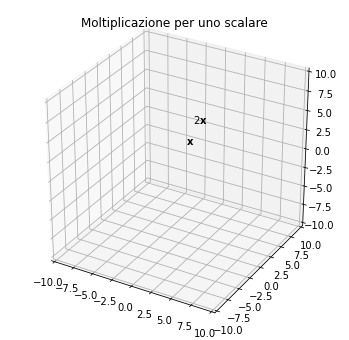

In [56]:
plot_vectors_3d(x, 2 * x, colors=['r', 'b'], xlim=10., ylim=10., zlim=10., title="Moltiplicazione per uno scalare", labels=['$\mathbf{x}$', '$2\mathbf{x}$'])

Possiamo trasformare qualsiasi vettore in modo *point-wise*, applicando una funzione qualsiasi su ogni entrata del vettore. Se $f: \mathbb{R} \to \mathbb{R}$ e $\mathbf{x} = (x_1, \dots, x_n)$ allora $$ f(\mathbf{x})= (f(x_1), \dots, f(x_n)),$$ definisce una trasformazione $f: \mathbb{R}^n \to \mathbb{R}^n$ (abbiamo usato lo stesso nome $f$ per la funzione scalare e la funzione *point-wise* ma avendo la segnatura diversa (il dominio e il codominio) sono applicazioni diverse.

In [57]:
# funzione arbitraria sulle componenti

x = np.array([np.pi, 0., np.pi/2.])
y = np.array([0., 1.])
z = np.array([np.e, 1.])
print(f"np.sin(x) = { np.sin(x) }")
print(f"np.cos(x) = { np.cos(x) }")
print(f"np.exp(y) = { np.exp(y) }")
print(f"np.log(z) = { np.log(z) }")

np.sin(x) = [1.2246468e-16 0.0000000e+00 1.0000000e+00]
np.cos(x) = [-1.000000e+00  1.000000e+00  6.123234e-17]
np.exp(y) = [1.         2.71828183]
np.log(z) = [1. 0.]


Altre funzioni agiscono in modo *globale* (non puntuale) su un vettore. Tipicamente queste funzioni restituiscono uno scalare in output. Le più comuni sono il *massimo*, il *minimo*, la *media*. Troviamo il valore massimo, medio e minimo del valore in EUR del Bitcoin nel passato:

In [63]:
print(f"np.mean(bitcoin_total) = { np.mean(bitcoin_total) }")
print(f"bitcoin_total.mean() = { bitcoin_total.mean() }")     # in alternativa possiamo usare il metodo `mean` dell'oggetto
print(f"np.min(bitcoin_total) = {np.min(bitcoin_total)}")
print(f"np.max(bitcoin_total) = {np.max(bitcoin_total)}")

np.mean(bitcoin_total) = 6711.290443071488
bitcoin_total.mean() = 6711.290443071488
np.min(bitcoin_total) = 68.43099975585938
np.max(bitcoin_total) = 63503.45793019


Un'operazione globale molto importante è la norma di un vettore: $$\Vert \mathbf{x} \Vert = \sqrt{x_1^2 + \dots + x_n^2}.$$ Per un vettore geometrico in $\mathbb{R}^2$ o $\mathbb{R}^3$ la norma e' la distanza della testa del vettore dall'origine. Più in generale con la norma possiamo definire distanze naturali tra vettori astratti in spazi vettoriali qualsiasi (riprenderemo questo discorso tra poche righe). In Numpy, la norma di un vettore può essere calcolata attraverso la funzione `linalg.norm` (presente nel sottomodulo `linalg`):

In [64]:
x = np.array([1., 2., 3.])
y = np.array([0., 2., 0.])

print(f"x = {x}")
print(f"y = {y}")

print(f"np.linalg.norm(x) = { np.linalg.norm(x) }")
print(f"np.linalg.norm(y) = { np.linalg.norm(y) }")

x = [1. 2. 3.]
y = [0. 2. 0.]
np.linalg.norm(x) = 3.7416573867739413
np.linalg.norm(y) = 2.0


A questo punto possiamo usare quello che abbiamo visto fin'ora per creare (boomer alert!) un *simpatico orologio* ⏰! Usiamo due vettori, `hours` e `minutes`, e applichiamo su ognuno trasformazioni trigonometriche per ruotarli in senso orario: $$\begin{cases}x_{t+1} = \cos{(vt)}x_{t} - \sin{(vt)} y_t \\ y_{t+1} = \sin{(vt)}x_{t} + \cos{(vt)}y_{y}\end{cases}.$$ Nel seguente esempio facciamo compiere alla lancetta dei minuti 3 giri mentre quella delle ore ne compie uno (quindi ci troviamo su un pianeta che ruota $12 / 3 = 4$ volte più velocemente della Terra).

In [61]:
from matplotlib.animation import FuncAnimation
%matplotlib notebook

minutes = np.array([0., 1.])
hours = np.array([0., 0.5])

v_hours = 2*np.pi
v_minutes = 3 * v_hours

head_width=0.04
head_length=0.1
color1 = 'r'
color2 = 'b'

fig = plt.figure(figsize=(6, 6))
plt.cla()
ax = fig.add_subplot()
# ax.arrow(0, 0, new_x1[0], new_x1[1], fc=color1, ec=color1, head_width=head_width, head_length=head_length)


def animate(t):
    ax.cla()
    ax.set_title("Orologio alieno")
    new_minutes = np.array([np.cos(v_minutes*t/100)*minutes[0] + np.sin(v_minutes*t/100)*minutes[1],
                       - np.sin(v_minutes*t/100)*minutes[0] + np.cos(v_minutes*t/100)*minutes[1]])
    new_hours =  np.array([np.cos(v_hours*t/100)*hours[0] + np.sin(v_hours*t/100)*hours[1],
                           - np.sin(v_hours*t/100)*hours[0] + np.cos(v_hours*t/100)*hours[1]])
    ax.arrow(0, 0, new_minutes[0], new_minutes[1], fc=color1, ec=color1, head_width=head_width, head_length=head_length)
    ax.arrow(0, 0, new_hours[0], new_hours[1], fc=color2, ec=color2, head_width=head_width, head_length=head_length)
    ax.set_xlim([-1.2, 1.2])
    ax.set_ylim([-1.2, 1.2])

anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


Adesso possiamo passare alle operazioni binarie. Come detto in precedenza, l'operazione binaria fondamentale è la somma tra vettori. Riprendiamo l'esempio della Sezione 1.a:

In [65]:
# somma tra vettori
x = np.array([0, 3, 4.])
y = np.array([3., 4., -0.5])

print(f"x = {x}")
print(f"y = {y}")

print(f"x + y = {x + y}")
# la somma tra vettori gode della proprietà commutativa
print(f"y + x = {y + x}")

x = [0. 3. 4.]
y = [ 3.   4.  -0.5]
x + y = [3.  7.  3.5]
y + x = [3.  7.  3.5]


In [66]:
plot_vectors_3d(x, y, x + y, colors=['r', 'b', 'g'], xlim=10., ylim=10., zlim=10., title="Somma tra vettori", labels=['$\mathbf{x}$', '$\mathbf{y}$', '$\mathbf{x}+\mathbf{y}$'])

<IPython.core.display.Javascript object>

Un'altra operazione utile che possiamo effettuare con due vettori $\mathbf{x} = (x_1, \dots, x_n)$ e $\mathbf{y} = (y_1, \dots, y_n)$ della stessa dimensione è il *prodotto point-wise* $\mathbf{x} \odot \mathbf{y}$ (detto anche *prodotto di Haddamard*). Tale prodotto è semplicemente dato dal vettore avente per componenti i prodotti tra le singole entrate dei due vettori (notare la natura locale, simile alle operazioni point-wise unarie viste in precedenza), $$\mathbf{x} \odot \mathbf{y} = (x_1y_1, \dots, x_ny_n)$$

In [67]:
# prodotto point-wise tra vettori
x = np.array([0, 3, 4.])
y = np.array([3., 4., -0.5])

print(f"x = {x}")
print(f"y = {y}")

print(f"x * y = {x * y}")
# il prodotto point-wise gode della proprietà commutativa
print(f"y * x = {y * x}")

x = [0. 3. 4.]
y = [ 3.   4.  -0.5]
x * y = [ 0. 12. -2.]
y * x = [ 0. 12. -2.]


Infine, introduciamo il prodotto scalare tra due vettori in $\mathbb{R}^n$. Dati due vettori $\mathbf{x} = (x_1, \dots, x_n)$ e $\mathbf{y} = (y_1, \dots, y_n)$, il *prodotto scalare standard* (in inglese è detto *dot product* o *standard inner product*) è definito come $$\mathbf{x} \cdot \mathbf{y} = \langle \mathbf{x}, \mathbf{y} \rangle = x_1y_1 + \dots + x_ny_n.$$ Il nome di questo prodotto deriva dal fatto che l'output dell'operazione è uno scalare. Su uno spazio vettoriale $V$ possiamo definire una vasta gamma di prodotti scalari (se il campo dei scalari dello spazio vettoriale è l'insieme dei numeri complessi $\mathbb{C}$ si parla di *prodotti Hermitiani*, che hanno proprietà leggermente diverse dai prodotti scalari reali), ma lavoreremo principalmente con il prodotto scalare standard in $\mathbb{R}^n$, quindi sottindenderemo l'attributo standard in seguito.

Il prodotto scalare gode delle seguenti proprietà fondamentali:
1. Proprietà commutativa: $$\langle \mathbf{x}, \mathbf{y} \rangle =\langle \mathbf{y}, \mathbf{x} \rangle$$
2. Bilinearità: $$\langle \lambda_1 \mathbf{x}_1 + \mu_1 \mathbf{y}_1, \lambda_2 \mathbf{x}_2 + \mu_2 \mathbf{y}_2 \rangle =
\lambda_1\lambda_2 \langle \mathbf{x}_1, \mathbf{x}_2 \rangle +
\lambda_1\mu_2 \langle \mathbf{x}_1, \mathbf{y}_2 \rangle +
\mu_1\lambda_2 \langle \mathbf{y}_1, \mathbf{x}_2 \rangle +
\mu_1\mu_2 \langle \mathbf{y}_1, \mathbf{y}_2 \rangle$$
3. Definita positività: $$x \neq \mathbf{0} \Rightarrow \langle \mathbf{x}, \mathbf{x} \rangle > 0$$

In $\mathbb{R}^n$ la norma di un vettore può essere definita a partire dal concetto di prodotto scalare. Infatti:
$$ \Vert \mathbf{x} \Vert = \sqrt{x_1^2 + \dots x_n^2} = \sqrt{x_1x_1 + \dots x_nx_n} = \sqrt{\langle \mathbf{x}, \mathbf{x} \rangle}.$$ Da notare che $\Vert \mathbf{x} \Vert^2 = \langle \mathbf{x}, \mathbf{x} \rangle$.

In Numpy il prodotto scalare viene effettuato con la funzione `inner` oppure con l'operatore `@`:

In [68]:
# prodotto scalare
x = np.array([1., 3., 5.])
y = np.array([0., -1., 2.])

print(f"np.inner(x, y) = {np.inner(x, y)}")
print(f"x @ y = {x @ y}")
# controlliamo che la norma di un vettore e' data dalla radice del prodotto scalare di un vettore con se stesso
print(f"np.linalg.norm(x) = {np.linalg.norm(x)}")
print(f"np.sqrt(x @ x) = {np.sqrt(x @ x)}")

np.inner(x, y) = 7.0
x @ y = 7.0
np.linalg.norm(x) = 5.916079783099616
np.sqrt(x @ x) = 5.916079783099616


##### Esercizi

1. Inverti il verso di rotazione dell'orologio.
2. Consideriamo $\mathbb{R}^n[x]$, lo spazio vettoriale dei polinomi di grado al più $n$ (dimostra che è in effetti uno spazio vettoriale). Qualsiasi polinomio $$p(x) = a_n x^n + \dots + a_1 x + a_0$$ può essere rappresentato dal vettore dei coefficienti $$\mathbf{x} = (a_n, \dots, a_0)$$ (contentente $n+1$ elementi). Disegna il polinomio rappresentato da $\mathbf{x} = (2., 1., 2.)$. (Hint: definisci un vettore contenente punti sull'asse delle $x$, poi applica operazioni su questo vettore per ottenere il vettore delle rispettive $y$)

In [ ]:
# spazio lasciato per gli esercizi

### 1.d Combinazioni lineari, (In)Dipendenza lineare, Basi, Dimensione

Usando le operazioni di uno spazio vettoriale (somma tra vettori e moltiplicazione per uno scalare) possiamo scrivere un vettore usando altri vettori. Una scrittura di questo tipo è detta *combinazione lineare*. Per esempio: $$ (1, 2, 3) = 1 (1, 0, 0) + 2 (0, 1, 0) + 3 (0, 0, 1) = 1 \mathbf{e}_1 + 2 \mathbf{e}_2 + 3 \mathbf{e}_3$$

In [69]:
x = np.array([1., 2., 3.])
e1 = np.array([1., 0., 0.])
e2 = np.array([0., 1., 0.])
e3 = np.array([0., 0., 1.])

# quando utilizziamo l'operatore di uguaglianza == tra vettori, Numpy effettua tale operazione
# su ogni entrata restituendo un vettore booleano
print(f"x == e1 + 2*e2 + 3*e3 = {x == e1 + 2*e2 + 3*e3}")

# nel caso in cui vogliamo verificare l'uguaglianza tra vettori globalmente bisogna chiamare .all() sul vettore booleano,
# la funzione restituisce True solo se tutte le entrate sono True
print(f"(x == e1 + 2*e2 + 3*e3).all() = { (x == e1 + 2*e2 + 3*e3).all()}")

x == e1 + 2*e2 + 3*e3 = [ True  True  True]
(x == e1 + 2*e2 + 3*e3).all() = True


I coefficienti nella combinazione lineare precedente sono semplicemente $\lambda_1 = 1$, $\lambda_2 = 2$ e $\lambda_3 = 3$ avendo scritto $\mathbf{x}$ usando $\mathbf{e}_1 = (1, 0, 0), \mathbf{e}_2 = (0, 1, 0), \mathbf{e}_3 = (0, 0, 1)$. Se vogliamo scrivere lo stesso vettore come combinazione lineare di $\mathbf{x}_1 = (1, 0, 1), \mathbf{x}_2 = (0, 2, 0), \mathbf{x}_3 = (0, 2, 1)$ risulta più difficile trovare i coefficienti (Esercizio 1.d.1).

Come esempio ulteriore, carichiamo dal disco le due tracce audio `bass.wav` e `drums.wav`.

In [70]:
import librosa
import numpy as np
sr = 44100
bass, _ = librosa.load('bass.wav', sr=sr)
drums, _ = librosa.load('drums.wav', sr=sr)

I dati musicali caricati sono segnali audio campionati a 44100 Hz, ossia ogni secondo di suono è rappresentato da 44100 componenti. Vediamo il numero di componenti totali nei due vettori:

In [71]:
print(f"bass.shape = {bass.shape}")
print(f"drums.shape = {drums.shape}")
print(f"drums.shape[0] / 44100 = {drums.shape[0] / 44100}s = {drums.shape[0] / (44100 * 60)}m")
print(f"bass.shape[0] / 44100 = {bass.shape[0] / 44100}s = {drums.shape[0] / (44100 * 60)}m")

bass.shape = (10652672,)
drums.shape = (10652672,)
drums.shape[0] / 44100 = 241.5571882086168s = 4.02595313681028m
bass.shape[0] / 44100 = 241.5571882086168s = 4.02595313681028m


Le due tracce hanno la stessa lunghezza, ossia 241 secondi (4 minuti). Visualizziamo il decimo secondo di entrambe le tracce.

In [72]:
t = 10 #
bass = bass[t*sr:(t+1)*sr]
drums = drums[t*sr:(t+1)*sr]

In [73]:
y = bass
x = np.arange(y.shape[0])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.set_xlabel('t')
ax.set_title('Basso')
ax.plot(x, y, '-')
plt.show()

import IPython
IPython.display.Audio(y, rate=sr)

<IPython.core.display.Javascript object>

In [74]:
y = drums
x = np.arange(y.shape[0])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.set_xlabel('t')
ax.set_title('Batteria')
ax.plot(x, y, '-')
plt.show()

IPython.display.Audio(y, rate=sr)

<IPython.core.display.Javascript object>

Effettuando la seguente combinazione lineare dei due vettori otteniamo la mistura:

In [75]:
mix = 0.5 * bass + 0.5 * drums
y = mix
x = np.arange(y.shape[0])

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()
ax.set_xlabel('t')
ax.set_title('Mistura')
ax.plot(x, y, '-')
plt.show()

IPython.display.Audio(y, rate=sr)

<IPython.core.display.Javascript object>

Se possiamo scrivere il vettore nullo $\mathbf{0}$ come combinazione lineare di un insieme di vettori $X$ dove almeno un coefficiente nella combinazione non è lo 0, allora i vettori in   sono detti linearmente dipendenti. Per esempio:

In [78]:
x = np.array([1., 2., 3.])
e1 = np.array([1., 0., 0.])
e2 = np.array([0., 1., 0.])
e3 = np.array([0., 0., 1.])

print(f"(np.zeros(3) == 1*x - 1*e1 - 2*e2 - 3*e3).all() = { (np.zeros(3) == 1*x - 1*e1 - 2*e2 - 3*e3).all() }")

(np.zeros(3) == 1*x - 1*e1 - 2*e2 - 3*e3).all() = True


I vettori $\{\mathbf{x}, \mathbf{e}_1, \mathbf{e}_2, \mathbf{e}_3\}$ sono linearmente dipendenti avendo scritto il vettore $\mathbf{0}$ usando una combinazione lineare in cui almeno un coefficiente era diverso da 0 (in questo caso, tutti i coefficienti sono diversi da 0). Se proviamo a scrivere il vettore $\mathbf{0}$ usando l'insieme  $\{\mathbf{e}_1, \mathbf{e}_2\}$ l'unica combinazione lineare possibile è la seguente: $$\mathbf{0} = 0\mathbf{e}_1 + 0\mathbf{e}_2 $$

L'insieme $\{\mathbf{e}_1, \mathbf{e}_2\}$ è detto *linearmente indipendente* (non essendo linearmente dipendente). Se possiamo scrivere *ogni* vettore $v$ di uno spazio vettoriale $V$ come combinazione lineare di un insieme di vettori linearmente indipendenti $B = \{b_1, \dots, b_n\}$, allora *B* è detto *base* di $V$ (in tal caso si dimostra che la combinazione lineare è unica). Il vettore $\mathbf{x} = (x_1, \dots, x_n)$ di $\mathbb{R}^n$ che contiene i coefficienti della combinazione lineare $v = x_1 b_1 + \dots + x_n b_n$ è detto vettore delle *coordinate* di $v$. Si può dimostrare che ogni spazio vettoriale ammette una base e che due basi di uno stesso spazio vettoriale contengono lo stesso numero di elementi (la *dimensione* dello spazio).

Per esempio una base di $\mathbb{R}^n$ è $\{\mathbf{e}_1, \dots, \mathbf{e}_n\}$, detta anche *base canonica* o *base standard*.

In [79]:
e1 = np.array([1., 0.,])
e2 = np.array([0., 1.])
x1 = np.random.rand(2)
x2 = np.random.rand(2) # è poco probabile (evento a misura nulla) ottenre un vettore linearmente dipendente a x1 (ossia che sta nella retta su cui poggia x1), ma comunque potrebbe stare vicino (in tal caso si può fare un refresh per avere un nuovo candidato più visualizzabile)
plot_vectors_2d(e1, e2, x1, x2, colors=['r', 'r', 'b', 'b'], title="Due basi", labels=['$\mathbf{e}_1$', '$\mathbf{e}_2$',
                                                                                       '$\mathbf{x}_1$', '$\mathbf{x}_2$'])

<IPython.core.display.Javascript object>

Il concetto di base ha una importanza capillare nell'algebra lineare e nel calcolo numerico più in generale. Questo perchè avendo fissato una base $B$ in uno spazio vettoriale $V$ ($n$-dimensionale) qualsiasi, possiamo rappresentare tutti gli elementi di $V$ con i vettori delle coordinate rispetto alla base $B$. Quindi scelta una base $B$ ($n$-dimensionale), $V$ ha la stessa struttura di $\mathbb{R}^n$ e possiamo fare tutti i calcoli in quest'ultimo spazio.

Per esempio, come visto nell'esercizio sui polinomi, ogni polinomio di $\mathbb{R}^n[x]$è in relazione biunivoca con un vettore di coefficienti in $\mathbb{R}^{n+1}$ scegliendo la base $B = \{1, x, x^2, \dots, x^n\}$:
$$v = 2x^2 + 3x + 1 \Rightarrow \mathbf{x} = (2, 3, 1)$$
$$v = -2x^3 - x^2 + 5 \Rightarrow \mathbf{x} = (-2, -1, 0, 5).$$

Quando lo spazio $V$ è $\mathbb{R}^n$, sia il vettore che vogliamo rappresentare che la rappresentazione in una base $B$ (il vettore delle coordinate) è una $n$-upla $(x_1, \dots, x_n)$. Per esempio possiamo considerare il vettore $(1, 2, 3)$: la sua rappresentazione rispetto alla base canonica è $(1,2,3)$ mentre se scegliamo per esempio la base $$B = \{(2, 1, -2), (2, 2, 2), (1, -1, 1)\},$$ la rappresentazione è $(-0.5, 1.125, -0.25)$. Come nota aggiuntiva, bisogna far attenzione al fatto che le entrate in un vettore di coordinate sono ordinate rispetto a un ordinamento dei vettori nella base. Per questo motivo, una base deve essere intesa come un insieme ordinato o una lista.
Controlliamo l'esempio precedente:

In [15]:
x = np.array([1, 2, 3])
b1 = np.array([2, 1, -2])
b2 = np.array([2, 2, 2])
b3 = np.array([1, -1, 1])
e1 = np.array([1., 0., 0.])
e2 = np.array([0., 1., 0.])
e3 = np.array([0., 0., 1.])

x_c = np.array([-0.5, 1.125, -0.25])
print(f"(x == x_c[0]*b1 + x_c[1]*b2 + x_c[2]*b3).all() = {(x == x_c[0]*b1 + x_c[1]*b2 + x_c[2]*b3).all()}")

(x == x_c[0]*b1 + x_c[1]*b2 + x_c[2]*b3).all() = True


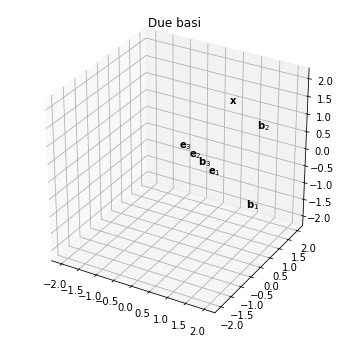

In [16]:
plot_vectors_3d(x, b1, b2, b3, e1, e2, e3, colors=['g', 'r', 'r', 'r', 'b', 'b', 'b'], title="Due basi", labels=['$\mathbf{x}$', '$\mathbf{b}_1$',
                                                                                                                 '$\mathbf{b}_2$', '$\mathbf{b}_3$',
                                                                                                                 '$\mathbf{e}_1$', '$\mathbf{e}_2$',
                                                                                                                 '$\mathbf{e}_3$'],
                xlim=2.2, ylim=2.2, zlim=2.2)

Come visto sopra, spesso ci ritroviamo a usare due basi diverse $B_1$ e $B_2$ in $\mathbb{R}^n$ (tipicamente una delle due è la base canonica). Vedremo in seguito come effettuare *cambiamenti di base* (ossia come cambiano le coordinate passando da una base a un'altra). La situazione diventa più manegevole quando usiamo basi detto *ortonormali*. Due vettori $\mathbf{x}_1$ e $\mathbf{x}_2$ di $\mathbb{R}^n$ sono detti *ortogonali* se $\langle \mathbf{x}_1, \mathbf{x}_2 \rangle = 0$. Questa proprietà generalizza il concetto di angolo retto tra due vettori geometrici a spazi vettoriali finito-dimensionali qualsiasi in cui sia possibile definire il prodotto scalare. Inoltre se vale *anche* $\Vert \mathbf{x}_1 \Vert = \Vert \mathbf{x}_2 \Vert = 1$ (ossia hanno norma 1 entrambi), allora i due vettori sono detti *ortonormali*. Se i vettori di una base sono ortonormali a due a due allora la base è detta ortonormale. La base canonica è ortonormale:

In [18]:
e1 = np.array([1., 0., 0.])
e2 = np.array([0., 1., 0.])
e3 = np.array([0., 0., 1.])

print(f"np.linalg.norm(e1) = { np.linalg.norm(e1) }")
print(f"np.linalg.norm(e2) = { np.linalg.norm(e2) }")
print(f"np.linalg.norm(e3) = { np.linalg.norm(e3) }")
print(f"e1 @ e2 = { e1 @ e2 }")
print(f"e1 @ e3 = { e1 @ e3 }")
print(f"e2 @ e3 = { e2 @ e3 }")

np.linalg.norm(e1) = 1.0
np.linalg.norm(e2) = 1.0
np.linalg.norm(e3) = 1.0
e1 @ e2 = 0.0
e1 @ e3 = 0.0
e2 @ e3 = 0.0


Applicando le rotazioni alla base canonica otteniamo tutte le possibili basi ortonormali (a meno dell'ordinamento; come possiamo ottenerle tutte a partire dalla base canonica incluso gli ordinamenti? Esercizio!)

## 2. Matrici


### 2.a Creazione di matrici

Avendo famigliarizzato con i vettori, non è molto complicato passare alle matrici.

Ricordiamo che una matrice $m \times n$ (reale) $X$ è una tabella contenente numeri reali disposti su $m$ righe ed $n$ colonne: $$ \begin{bmatrix}X_{1,1}&  \dots & X_{1,n} \\ 
\vdots &  \ddots & \vdots \\ X_{m,1} & \dots & X_{m,n}\end{bmatrix}$$ 

In Numpy una matrice è rappresentata sempre da un oggetto di tipo `numpy.ndarray`, che contiene due *assi* (detti anche dimensioni in Numpy, termine che cercheremo di evitare dato che può essere confuso con il concetto di dimensione di uno spazio vettoriale) invece di uno solo come nel caso dei vettori. Nel caso della matrice precedente, il primo asse contiene $m$ entrate mentre il secondo $n$ entrate.

Possiamo creare delle matrici passando alla funzione `array` una lista di liste (invece che una semplice lista) oppure attraverso la funzione `random.rand`:

In [24]:
X1 = np.array([[1., 2.], [3., 4.]])
X2 = np.random.rand(2, 3) # passiamo il numero di righe e di colonne

print(f"X1 = {X1}")
print(f"X2 = {X2}")

X1 = [[1. 2.]
 [3. 4.]]
X2 = [[0.12433562 0.99019895 0.81710412]
 [0.32343035 0.30209482 0.82694582]]


Se uno dei due assi hanno una sola entrata, allora ci riduciamo al caso precedente ed otteniamo un vettore. Diversamente dal caso precedente però, abbiamo due possibili modi per descrivere il risultante vettore: come vettore *riga* o vettore *colonna*. Per esempio:

In [27]:
x = np.array([1., 2., 3.])
row_x = np.array([[1., 2., 3.]])
column_x = np.array([[1.],[2.],[3.]])

print(f"x = {x}")
print(f"row_x = {row_x}")
print(f"column_x = {column_x}")


x = [1. 2. 3.]
row_x = [[1. 2. 3.]]
column_x = [[1.]
 [2.]
 [3.]]


   2b. parlare del vettore riga e vettore colonna visto come matrice vs il vettore introdotto precedentemente che aveva solo 1 dimensione.
   2c. matrice zero, matrice identita', matrici diagonali (come fare diag), matrici triangolari, matrici ortogonali
   2d. operazioni comuni con matrici: trasposta, inversa (far vedere che inversa per matrice fa identita'), prodotto tra matrici
   2e. visualizzazione con matplotlib.plt.imshow delle matrici
   2f. esempi: proiettori, matrici di permutazione
   2g. far vedere cambiamento di base usando le matrici
   

## 3. Applicazioni lineari